In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab\ Notebooks/aml2024-students-copy/MiniAssignments/ma04_linear_regression

/content/drive/MyDrive/Colab Notebooks/aml2024-students-copy/MiniAssignments/ma04_linear_regression


In [4]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.rcParams.update({'font.size': 20})
import numpy as np


# Solving a linear regression problem

 We are fitting a straight line $$y=mx + c + n,$$ where $m$ and $c$ are the slope and y intercept, respectively. Here $n$ is the noise in the data.  

 We will first create the synthetic data using this model.


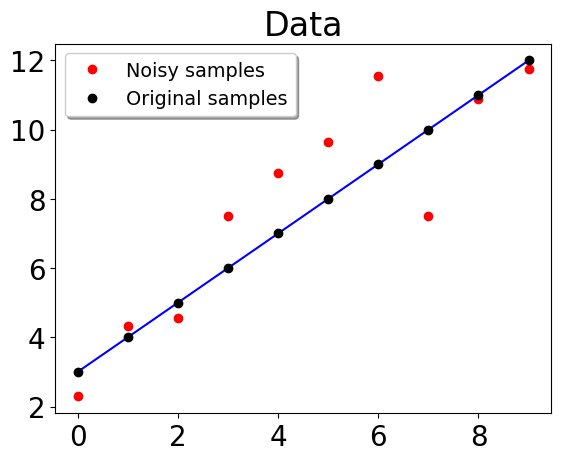

In [5]:
npoints = 10

# Line parameters
m = 1
c = 3

# Noise variance
sigma = 1

x = np.arange(npoints)
yorig = m*x + c
y = yorig + sigma*np.random.normal(size=npoints)

fig = plt.figure()
ax = fig.gca()
cs = ax.plot(x, y,'ro',label='Noisy samples')
cs = ax.plot(x, yorig,'b')
cs = ax.plot(x,yorig,'ko',label='Original samples')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-small')
c=plt.title('Data')


## Solving using polyfit (built-in function)

Polyfit fits a polynomial of degree d to the data to obtain the parameters

In [6]:
d = 1 # degree 1 polynomial
p = np.polyfit(x,y,d)           # Last argument is degree of polynomial
print('Coefficients',p)


Coefficients [0.9629366  3.54280524]


## Computing the fitted polynomial using polyval

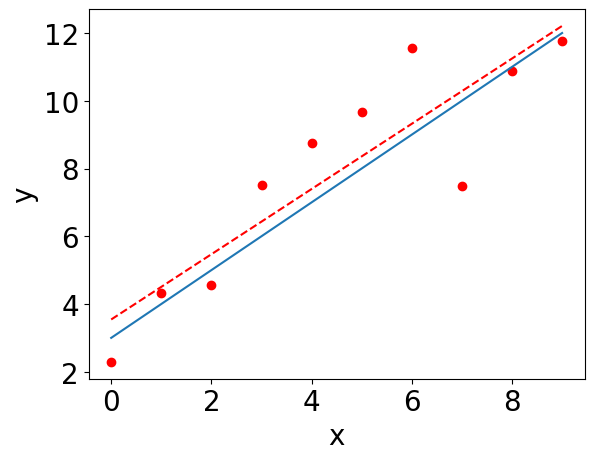

In [7]:
f = np.polyval(p,x)
fig = plt.figure()
plt.plot(x, y,'ro',f,'r--',yorig)
plt.ylabel('y')
plt.xlabel('x')
plt.show()


## Lifting the hood of polyfit; re-expressing in matrix form

Note that we are solving for $y=mx+c$, where $m$ is the slope and $c$ is the y intercept. This equation can be expressed in the matrix form as
$$ y = \begin{bmatrix}x&1\end{bmatrix}\begin{bmatrix}m\\c\end{bmatrix}$$

When we have multiple equations, we can concatenate the equations into the matrix form as

$$ \underbrace{\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix}}_{\mathbf y} = \underbrace{\begin{bmatrix}x_1&1\\x_2&1\\\vdots&\vdots\\x_N&1\\\end{bmatrix}}_{\mathbf X}\underbrace{\begin{bmatrix}m\\c\end{bmatrix}}_{\mathbf \theta}$$



In [8]:
x.size
X = np.column_stack((x,np.ones_like(x)));
print(X)

[[0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [7 1]
 [8 1]
 [9 1]]


## Visualize the cost
We are solving $\mathbf \theta = \arg \min_{\theta} \|\mathbf X\mathbf \theta-\mathbf y\|^2$. First let us visualize the cost function $\|\mathbf X\mathbf \theta-\mathbf y\|^2$ as a function of $m$ and $c$

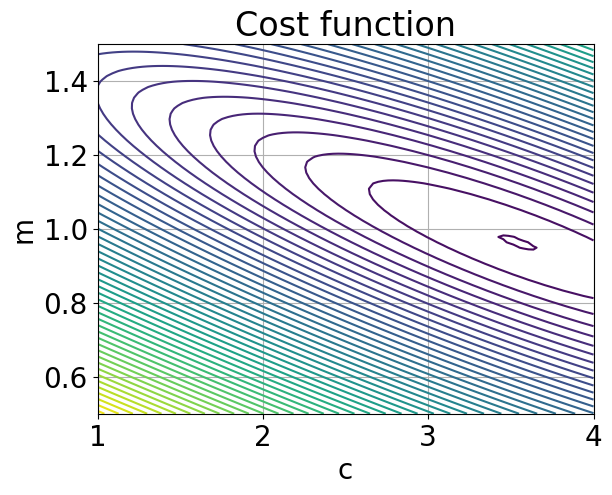

In [9]:
def cost(m, c,A,p):
    v=np.array([m,c], dtype=object)
    err = np.matmul(A,v)-p
    return(np.linalg.norm(err))

maxis = np.linspace(0.5, 1.5, 70)
caxis = np.linspace(1, 4, 100)
[m,c] = np.meshgrid(maxis,caxis)
result = cost(maxis[:,None], caxis[None,:],X,y)
h = plt.contour(caxis,maxis,result,50)
plt.ylabel('m')
plt.xlabel('c')
plt.title('Cost function')
plt.grid()
plt.show()

Note that the cost function has a well-defined global minimum around $m=1$ and $c=3$, which are the true parameters, in the absence of noise.

Differentiating and setting the cost to zero, we obtain the normal equations $$\left(\mathbf X^T \mathbf X\right) \mathbf \theta = \mathbf X^T \mathbf y$$. Note that $\mathbf A$ is a square matrix. If it is invertible, we obtain the optimal $\mathbf \theta$ as
$$\mathbf \theta^* = {\rm inv}\left(\mathbf X^T \mathbf X\right)\mathbf X^T \mathbf y$$

In [10]:
Q = np.matmul(np.transpose(X),X)
Q1 = np.matmul(np.linalg.inv(Q),np.transpose(X))
theta = np.matmul(Q1,y)
print('Estimated parameters are m=',theta[0],' and c=',theta[1])

Estimated parameters are m= 0.9629366037499866  and c= 3.542805243732454


## Evaluating the fitted points

We have the fit coefficients in $\mathbf p^*$. We can now compute the value of the points on this line as $y^*=m^*x+c^*$, where $m^*$ is the estimated slope and $c$ is the estimated y intercept. This equation can be expressed in the matrix form as
$$ y^* = \begin{bmatrix}x&1\end{bmatrix}\underbrace{\begin{bmatrix}m^*\\c^*\end{bmatrix}}_{\mathbf \theta^*}$$

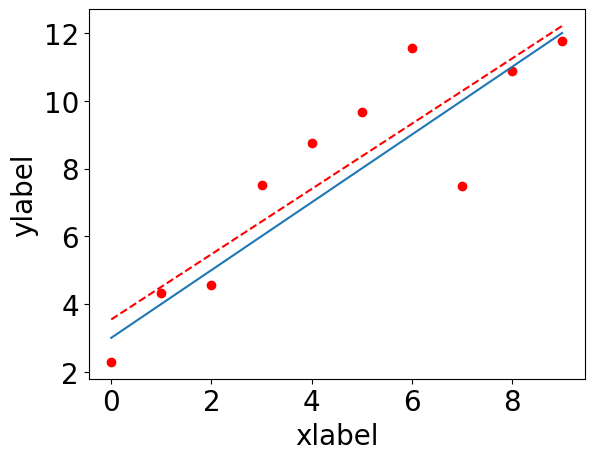

In [11]:
yfit = np.matmul(X,np.transpose(theta))
fig = plt.figure(2)
plt.plot(x, y,'ro',yfit,'r--',yorig)
plt.ylabel('ylabel')
plt.xlabel('xlabel')
plt.show()

# <font color=red> To do: Multidimensional polyfit code </font>

You now solve for the parameter $\mathbf \theta$ in the expansion $$f(x,y)=\theta[0] + \theta[1]~x + \theta[2]~y + \theta[3]~x^2 + \theta[4]~xy+ \theta[5]~y^2$$. You will fit this model to 100 points drawn from the function

$$z = x^2 + y^2$$

corrupted by noise. The code is similar to the 1-D case considered above. Specifically, the model is

$$ \underbrace{\begin{bmatrix}z_1\\z_2\\\vdots\\z_n\end{bmatrix}}_{\mathbf z} = \underbrace{\begin{bmatrix}1& x_1 & y_1 & x_1^2&x_1 y_1& y_1^2\\1& x_2 & y_2 & x_2^2&x_2 y_2& y_2^2\\\\1& x_N & y_N & x_N^2&x_N y_N& y_N^2\end{bmatrix}}_{\mathbf A}\underbrace{\begin{bmatrix}\theta[0]\\\theta[1]\\\vdots\\\theta[5]\end{bmatrix}}_{\mathbf \theta}$$

<font color=red> You will complete the section of the code marked TODO. Pay special attention to the order of the polynomials and the coefficients. Numpy might be ordering it differently. </font>


Estimated parameters are theta = [    0.01     0.00    -0.00     1.00    -0.00     1.00]


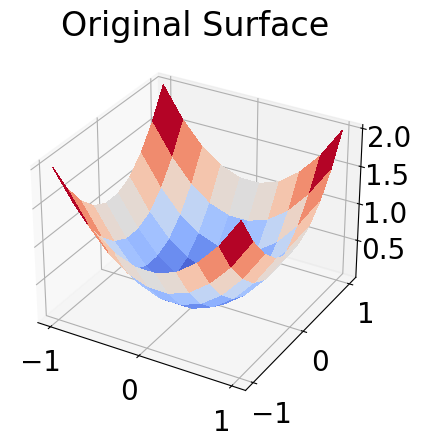

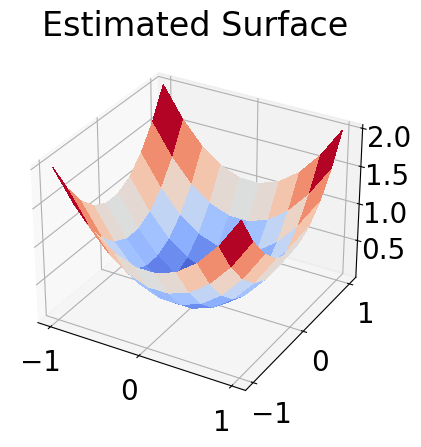

In [20]:
# Constructing the polynomial x^2 + y^2
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
x, y = np.meshgrid(x, y, copy=False)
Z = x**2 + y**2 + np.random.rand(*x.shape)*0.01


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('Original Surface')

X = x.flatten()
Y = y.flatten()

# Create the matrix A
A = np.column_stack((np.ones_like(X), X, Y, X**2, X*Y, Y**2)) # create multidimensional array
b = Z.flatten()  # Change from 2D array into a 1D array
# Solve for theta
Q, R = np.linalg.qr(A)
Q1 = Q.T @ b
theta = np.linalg.solve(R, Q1)


print("Estimated parameters are theta = [%8.2f %8.2f %8.2f %8.2f %8.2f %8.2f]" %(theta[0],theta[1],theta[2],theta[3],theta[4],theta[5]))

# Compute the estimated polynomial
Zest = theta[0] + theta[1]*x + theta[2]*y + theta[3]*x**2 + theta[4]*x*y+ theta[5]*y**2
fig1 = plt.figure()
ax = fig1.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, Zest, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
c=plt.title('Estimated Surface')


In [21]:
for i in range(6):
    print("theta[%d]=%10.2f"% (i,theta[i]))

theta[0]=      0.01
theta[1]=      0.00
theta[2]=     -0.00
theta[3]=      1.00
theta[4]=     -0.00
theta[5]=      1.00
